In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [24]:
focal = np.load('./camera_params/mtx.npy')
distance = 4
focal

array([[3.58341189e+03, 0.00000000e+00, 8.96257767e+02],
       [0.00000000e+00, 2.87934608e+04, 2.28124505e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

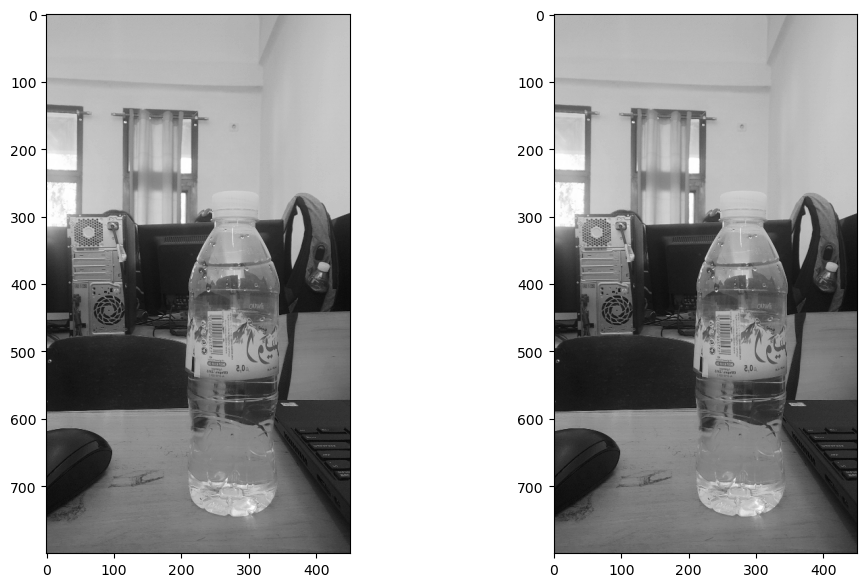

In [18]:
imgL = cv2.imread('./img1.jpg')
imgR = cv2.imread('./img1.jpg')

imgL = cv2.resize(imgL,(450,800))
imgR = cv2.resize(imgR,(450,800))


imgL = cv2.cvtColor(imgL,cv2.COLOR_BGR2GRAY)
imgR = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(imgL,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(imgR,cmap="gray")

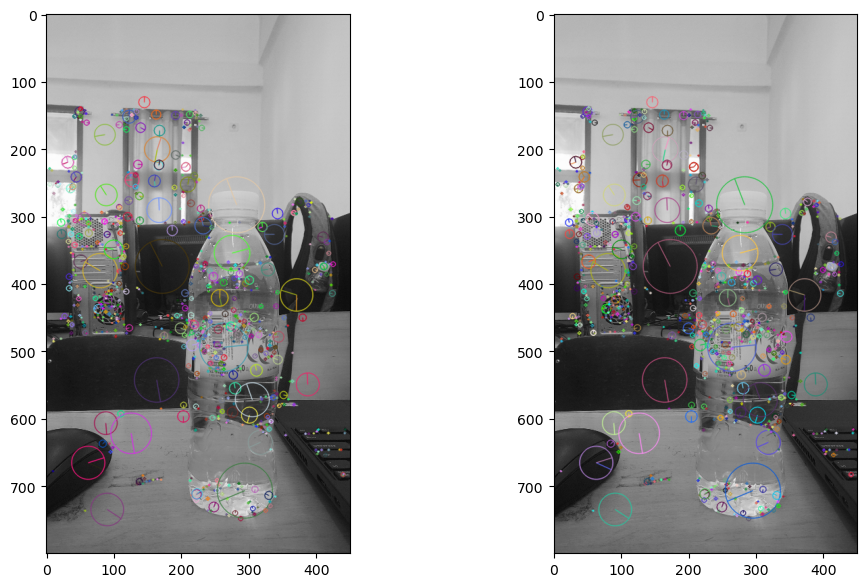

In [19]:
sift = cv2.SIFT_create()

kpL, desL = sift.detectAndCompute(imgL,None)
kpR, desR = sift.detectAndCompute(imgR,None)

sift_imgL=cv2.drawKeypoints(imgL,kpL,imgL,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
sift_imgR=cv2.drawKeypoints(imgR,kpR,imgR,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(sift_imgL)
plt.subplot(1,2,2)
plt.imshow(sift_imgR)

In [29]:
match = cv2.BFMatcher()
matches = match.knnMatch(desL,desR,k=2)
threshold = 15
good = []
ul_list = []
ur_list = []

for m,n in matches:
    if m.distance < 0.75*n.distance:
        kp1 = kpL[m.queryIdx]
        kp2 = kpR[n.trainIdx]
        if abs(kp1.pt[1] - kp2.pt[1]) < threshold: 
            good.append([m])
            ul_list.append(kp1.pt[0])
            ur_list.append(kp2.pt[0])
            # print(kp1.pt[1],kp2.pt[1])

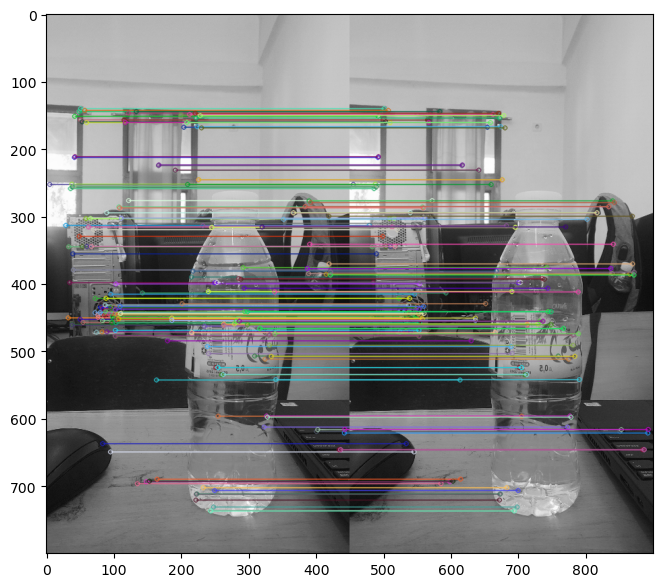

In [30]:
img_res = cv2.drawMatchesKnn(imgL,kpL,imgR,kpR,good, None, flags=2)

plt.figure(figsize=(12,7))
plt.imshow(img_res)

In [22]:
estimate_coord = []
X = []
Y = []
Z = []

for i,g in enumerate(good) : 
    x,y = kpL[g[0].queryIdx].pt
    z = (distance * focal[0,0]) / (ul_list[i]-ur_list[i])
    estimate_coord.append((int(x),int(y),int(z)))
    # print((int(x),int(y),int(z)))
    X.append(x)
    Y.append(y)
    Z.append(z)


plt.figure()
plt.scatter(X,Y,c=Z)
plt.colorbar()

/tmp/ipykernel_5712/1961637466.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  z = (distance * focal) / (ul_list[i]-ur_list[i])


OverflowError: cannot convert float infinity to integer